## Load Data

In [24]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 

# Set the option to display all columns when printing DataFrames
pd.set_option("display.max_columns", None)

import datetime

In [25]:
raw_df = pd.read_excel(r"Quality_Data.xlsx")
raw_df

,Class_Name,Comment_Lines,Classes,Functions,Statements,Lines,Lines_of_Code,Cyclomatic_Complexity,Cognitive_Complexity,Duplicated_Files,Duplicate_Blocks,Code_Smells,Technical_Dept_Min,Security_Review_Rating,Reliability_Remediation_Effort_Min,Reliability_Rating,Bugs,Blocker_Issues,High_Issues,Medium_Issue,Low_Issues,Maintainability_Index,Cyclomatic_Complexity2,Depth_of_Inheritance,Class_Coupling,Lines_of_Source_code,Lines_of_Executable_Code,Member_Count
0,ColorByNumbers/Framework/Scripts/Ads/AdNetwork...,74,1,76,215,740.0,499.0,157,70,0,0,8,75,1,0,1,0,0,0,0,8,81,169,1,8,732,170,121
1,ColorByNumbers/Framework/Scripts/Ads/AdNetwork...,1,1,17,9,510.0,54.0,17,0,0,0,4,20,1,0,1,0,0,0,0,4,93,17,2,6,498,9,22
2,ColorByNumbers/Framework/Scripts/Ads/AdNetwork...,0,1,17,9,357.0,54.0,17,0,0,0,4,20,1,0,1,0,0,0,0,4,92,17,2,8,343,9,22
3,ColorByNumbers/Framework/Scripts/Ads/Editor/Mo...,0,1,1,16,52.0,32.0,2,1,0,0,0,0,1,0,1,0,0,0,0,0,61,2,1,5,43,18,1
4,ColorByNumbers/Framework/Scripts/Ads/Editor/Mo...,32,1,24,167,497.0,330.0,62,39,0,0,23,119,1,0,1,0,0,0,5,18,67,62,2,13,487,157,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Scripts/SlideCenter.cs,1,1,1,1,13.0,10.0,1,0,0,0,1,5,1,5,3,1,0,0,1,1,100,1,1,1,12,3,1
132,Scripts/soundManager.cs,7,1,5,25,90.0,69.0,9,7,0,0,9,94,1,5,3,1,0,3,1,6,72,9,1,4,83,25,12
133,Scripts/UIzoom.cs,0,1,3,8,33.0,27.0,3,0,0,0,0,0,1,5,3,1,0,0,1,0,86,5,1,3,32,15,6
134,Scripts/UpperControl.cs,0,1,1,3,17.0,15.0,2,2,0,0,3,40,1,5,3,1,0,1,1,2,94,1,1,2,16,8,3


In [26]:
raw_df.columns 

Index(['Class_Name', 'Comment_Lines', 'Classes', 'Functions', 'Statements',
       'Lines', 'Lines_of_Code', 'Cyclomatic_Complexity',
       'Cognitive_Complexity', 'Duplicated_Files', 'Duplicate_Blocks',
       'Code_Smells', 'Technical_Dept_Min', 'Security_Review_Rating',
       'Reliability_Remediation_Effort_Min', 'Reliability_Rating', 'Bugs',
       'Blocker_Issues', 'High_Issues', 'Medium_Issue', 'Low_Issues',
       'Maintainability_Index', 'Cyclomatic_Complexity2',
       'Depth_of_Inheritance', 'Class_Coupling', 'Lines_of_Source_code',
       'Lines_of_Executable_Code', 'Member_Count'],
      dtype='object')

In [27]:
#pd.set_option('display.max_rows', None)
raw_df['Code_Smells']

0       8
1       4
2       4
3       0
4      23
       ..
131     1
132     9
133     0
134     3
135     4
Name: Code_Smells, Length: 136, dtype: int64

In [28]:
code_smell = raw_df[raw_df['Code_Smells'] != 0]
valid = raw_df[raw_df['Code_Smells'] == 0] 

code_smell_count = len(raw_df[raw_df['Code_Smells'] != 0])
valid_count = len(raw_df[raw_df['Code_Smells'] == 0]) 


print(f"Code Smell Cases: {code_smell_count}") 
print(f"Valid Transactions: {valid_count}") 

Code Smell Cases: 98
Valid Transactions: 38


In [29]:
raw_df = raw_df.drop(['Class_Name','Classes','Blocker_Issues','High_Issues','Medium_Issue','Low_Issues','Cyclomatic_Complexity2','Lines','Lines_of_Code','Security_Review_Rating','Reliability_Rating','Duplicated_Files'], axis=1)

30


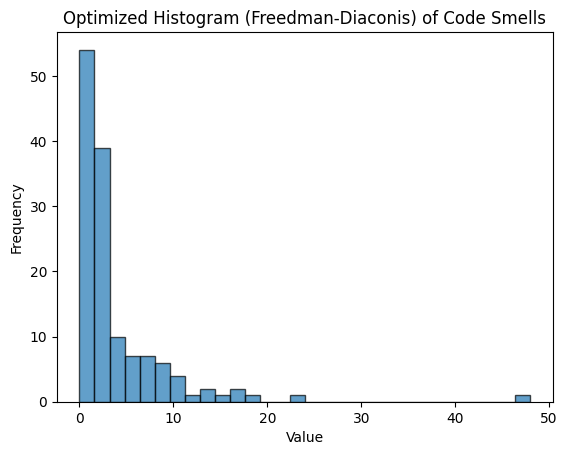

In [30]:
def freedman_diaconis(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1/3))
    bins = int((data.max() - data.min()) / bin_width)
    return bins

optimal_bins = freedman_diaconis(raw_df['Code_Smells'])
print(optimal_bins)
plt.hist(raw_df['Code_Smells'], bins=optimal_bins, edgecolor='k', alpha=0.7)
plt.title('Optimized Histogram (Freedman-Diaconis) of Code Smells')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

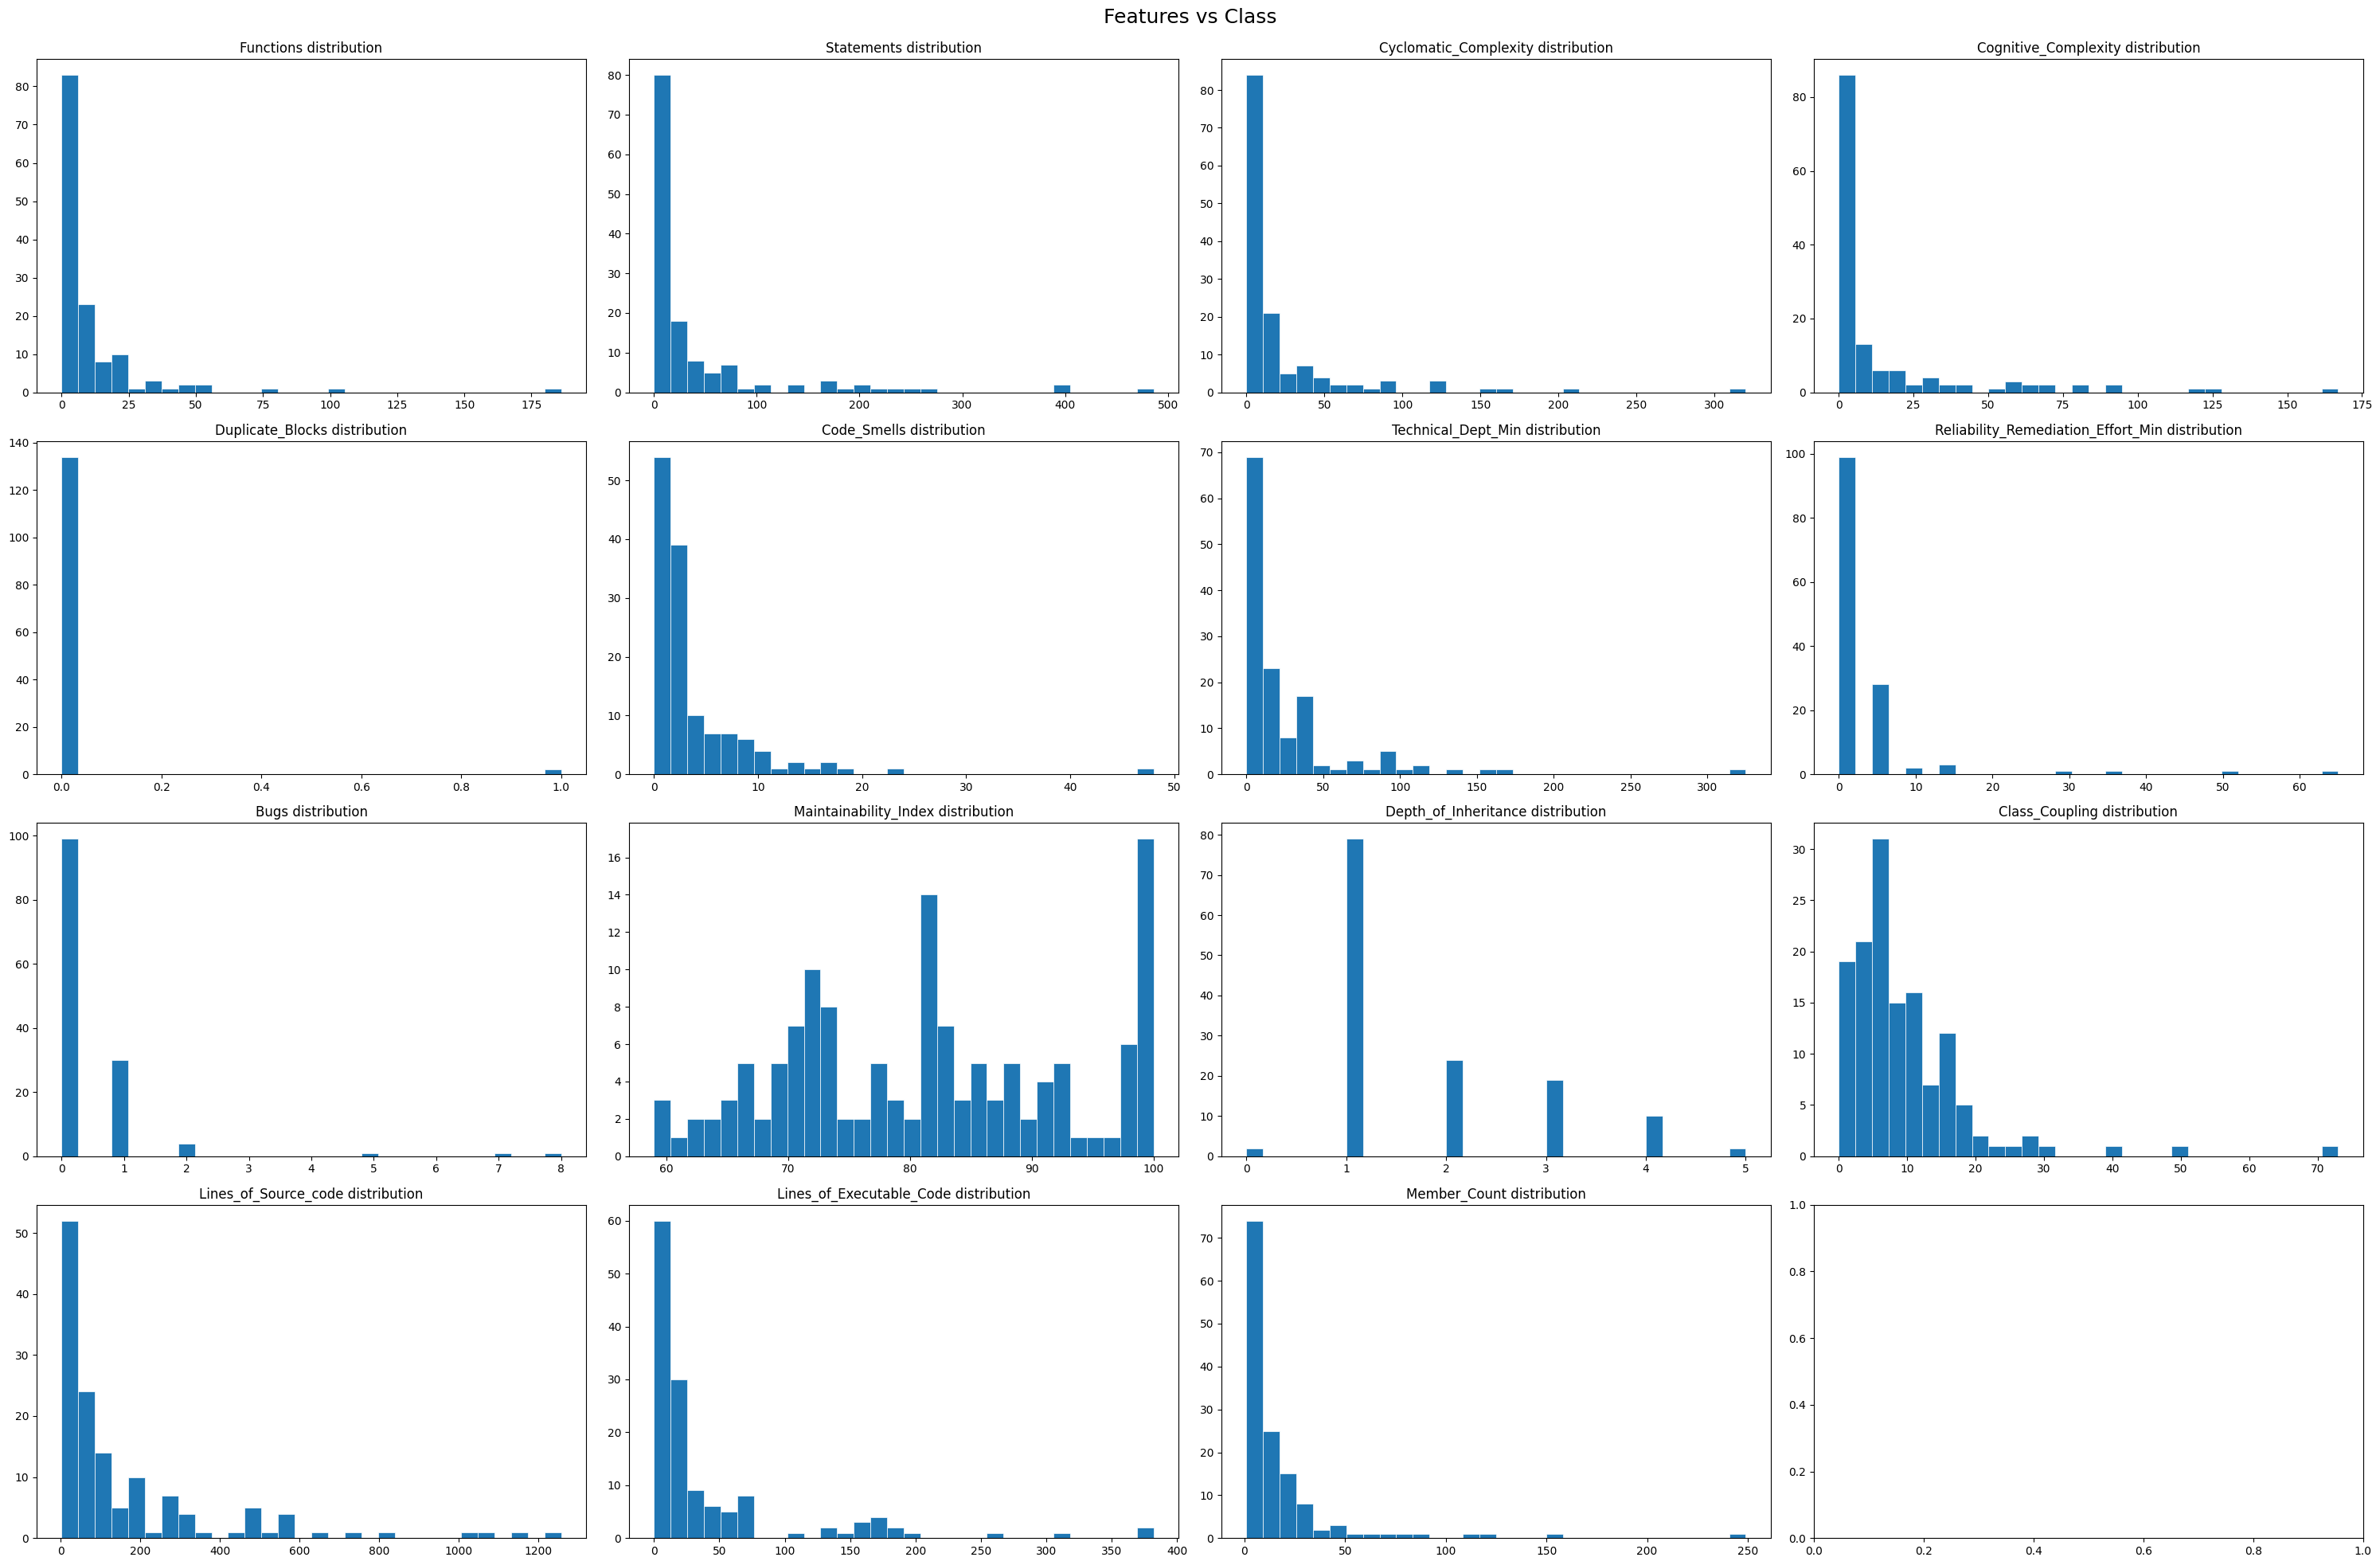

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 20))
fig.suptitle('Features vs Class\n', size=18)

feature_columns = raw_df.columns[1:28]  # Assuming the feature columns start from index 1

for i in range(4):
    for j in range(4):
        if (i * 4 + j) == 15:
         break
        col = feature_columns[i * 4 + j]
        axes[i, j].hist(raw_df[col], bins=30, linewidth=0.5, edgecolor="white")
        axes[i, j].set_title(f"{col} distribution")

plt.tight_layout()
plt.show()

## Preprocesssing Data

In [32]:
df = raw_df.copy()


In [33]:
df['Code_Smells_Labelled'] = pd.cut(df['Code_Smells'], bins=[-float('inf'), 2,8, float('inf')], labels=[0,1,2]).astype(int)

In [34]:
sorted_df = df.sort_values(by='Code_Smells')
sorted_df[['Code_Smells','Code_Smells_Labelled'] ]

,Code_Smells,Code_Smells_Labelled
48,0,0
65,0,0
62,0,0
61,0,0
60,0,0
...,...,...
58,16,2
107,17,2
72,18,2
4,23,2


In [35]:
df = df.drop('Code_Smells', axis=1)

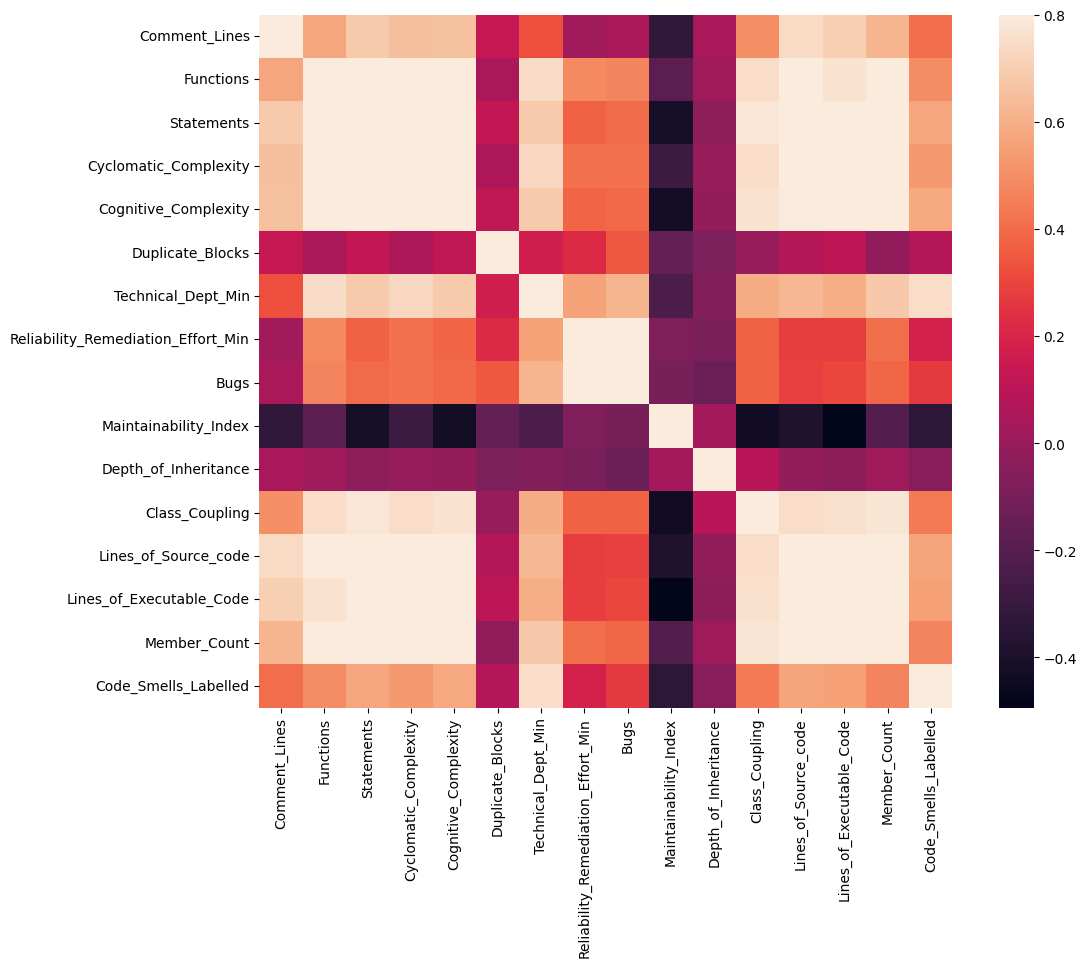

In [36]:
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

## Split Data

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.copy()
X = X.drop(['Code_Smells_Labelled'], axis=1)
y = df['Code_Smells_Labelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.4, random_state = 97)

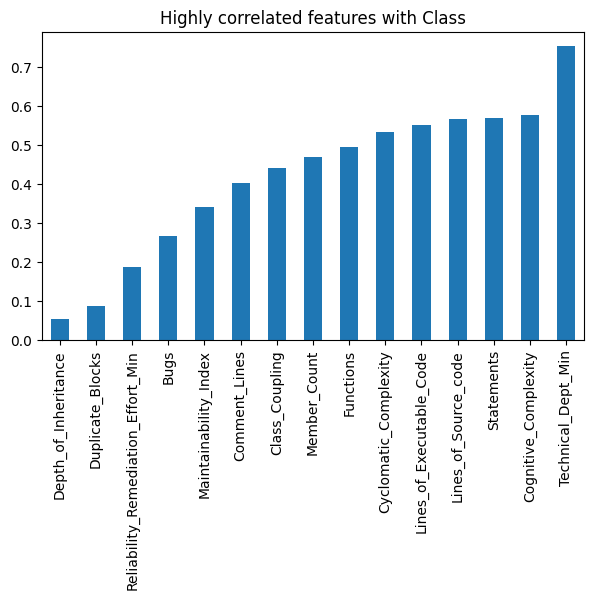

In [38]:
plt.figure(figsize=(7,4))
d = df.corr()['Code_Smells_Labelled'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

### Resampling

In [39]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [40]:
# 1. Resampling
resampling_techniques = {
    "SMOTE": SMOTE(),
    "Random": RandomOverSampler()
}

### ML

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
models = {
    "Random Forest": RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features= 3, min_samples_split= 2, n_estimators= 10, random_state= 13),
    "Decision Trees": DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_split= 2, random_state= 13)
}

# 1. Resampling
resampling_techniques = {
    "No Resampling": None,
    "SMOTE": SMOTE(),
    "Random Oversampling": RandomOverSampler()
}

In [43]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix 
from imblearn.pipeline import Pipeline as ImbPipeline
import time

In [44]:
# Modellerin karşılaştırılması için ROC eğrilerini ve confusion matrixleri tutacak listeler
metrics = {}
confusion_matrices = {}

# Pipeline'ı oluştur ve deneyleri yap
for resampling_name, resampler in resampling_techniques.items():
    for model_name, model in models.items():
        # imbalanced-learn Pipeline kullanımı
        pipeline = ImbPipeline([
            ('resampler', resampler) if resampler else ('identity_resampler', None),
            ('classifier', model)
        ])
        
        # Modeli eğit
        since = time.time()
        pipeline.fit(X_train, y_train)
        train_time = time.time() - since
        
        # Test seti üzerinde tahmin yap
        since2 = time.time()
        y_pred = pipeline.predict(X_test)
        test_time = time.time()-since2
        total_time = train_time+test_time

        # Sınıflandırma raporunu yazdır
        print(f"Resampling: {resampling_name}, Model: {model_name}")
        print(classification_report(y_test, y_pred))

        # Metrikleri hesapla
        #recall = recall_score(y_test, y_pred)
        #precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        #f1 = f1_score(y_test, y_pred)
        #mcc = matthews_corrcoef(y_test, y_pred)

        # Metrikleri sakla
        metrics[f"{model_name} - {resampling_name} "] = [accuracy, train_time, test_time, total_time, classification_report(y_test, y_pred)]

        # Confusion matrix'i sakla
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[f"{model_name} - {resampling_name} "] = cm


Resampling: No Resampling, Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.50      0.65      0.56        17
           2       0.00      0.00      0.00         6

    accuracy                           0.69        55
   macro avg       0.49      0.50      0.49        55
weighted avg       0.72      0.69      0.70        55

Resampling: No Resampling, Model: Decision Trees
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.59      0.76      0.67        17
           2       0.00      0.00      0.00         6

    accuracy                           0.76        55
   macro avg       0.51      0.56      0.53        55
weighted avg       0.73      0.76      0.74        55

Resampling: SMOTE, Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.84      0.92   

In [45]:
# Metrikleri DataFrame'e dönüştür
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Train_Time', 'Test_Time', 'Total_Time', 'Report'])

metrics_df_excel = metrics_df[[ 'Accuracy', 'Train_Time', 'Test_Time', 'Total_Time', 'Report']]
# Metrikleri CSV dosyasına kaydet
metrics_df_excel.to_csv('metrics3.csv')



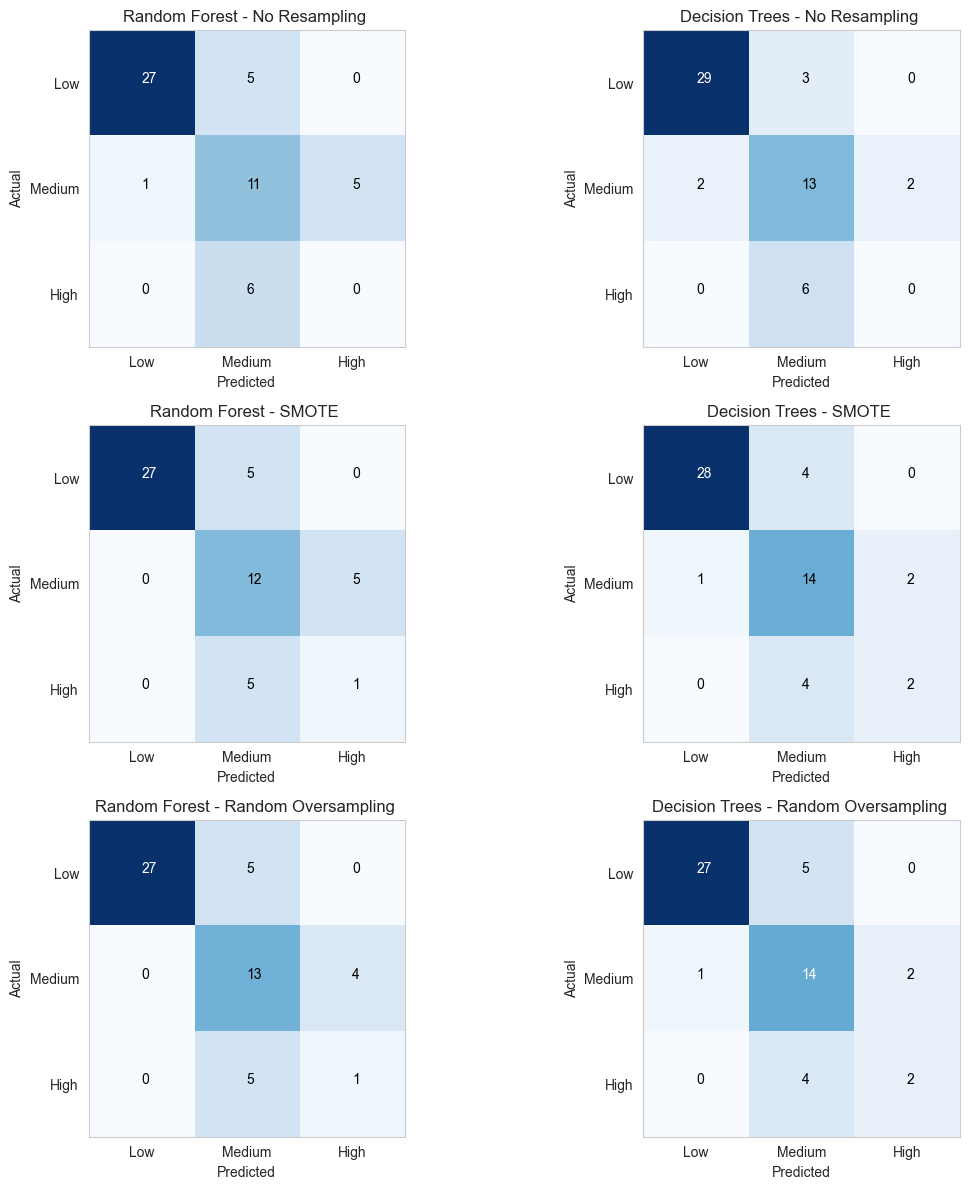

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Iterate over the confusion matrices and plot them
for i, (model_name, confusion_matrix) in enumerate(confusion_matrices.items()):
    ax = axes_flat[i]
    
    # Plot the confusion matrix
    im = ax.imshow(confusion_matrix, cmap="Blues", interpolation="nearest")
    
    # Add values inside the heatmap
    for row in range(len(confusion_matrix)):
        for col in range(len(confusion_matrix[0])):
            ax.text(col, row, f'{confusion_matrix[row, col]:.0f}', 
                    color="white" if confusion_matrix[row, col] > confusion_matrix.max() / 2 else "black")

    # Set title and labels
    ax.set_title(model_name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_xticklabels(['Low','Medium','High'])
    ax.set_yticklabels(['Low','Medium','High'])

    # Remove grid lines
    ax.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()